In [1]:
import os
import cv2
import skimage.data
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from PIL import Image
import random

In [2]:
class NeuralNetwork :
    # init the nerual network
       
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        # set number of nodes in each input, hidden, output layer          
        self.inodes= inputNodes
        self.hnodes= hiddenNodes
        self.onodes= outputNodes
        
        # learning rate          
        self.lr = learningRate
        
        # link weight matrices, wih and who
        #self.Wih = (np.random.rand(self.inodes,self.hnodes)-.5)
        #self.Who = (np.random.rand(self.hnodes,self.onodes)-.5)
        self.Wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.Who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        # activation function is the sigmoid function  
        self.activation_function = lambda x: scipy.special.expit(x)

        
    # train the neural network
    def train(self,input_list,target_list):
        # convert inputs list to 2d array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.Wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.Who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.Who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.Who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.Wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        #print(type(output_errors))
        _error = Error(targets,final_outputs)
        #_error = np.sum(np.abs(targets-final_outputs))/len(targets) 
        return output_errors

    # query the neural network
    def query(self,input_list):
        inputs = np.array(input_list,ndmin=2).T
        # matrix of inputs to give the signals into the  hidden layer nodes
        hidden_inputs = np.dot(self.Wih,inputs)
        # applying the activation  function
        hidden_outputs = self.activation_function(hidden_inputs)
        # matrix of inputs to give the signals into the  hidden layer nodes
        final_inputs = np.dot(self.Who,hidden_outputs)
        # applying the activation  function
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [25]:
#Evaluate num of inputs which are correctly predicted.
#Result output is the index of whichever neuron has the highest activation value
def Evaluate(test_data):
    #results = [(np.argmax(self.FeedForward(x)), y) for (x, y) in test_data]
    #return sum(int(x == y) for (x, y) in results)
    for i in range(len(test_images)):
        index = i
        correct = test_labels[index]
        test_input = ((np.asfarray(test_images[index]) / 255.0 * 0.99) + 0.01 ).flatten()
        output = n.query(test_input)
        #print(np.where(output == np.max(output)))
        label = np.argmax(output)
        if(label == int(correct)):
            count = count + 1
        #print(count)        
        #print("accuracy: {}".format((count/len(images))*100))
    return (count/len(images))*100

def Error(y, z):
        return np.sum(np.abs(y-z))/len(y)      

In [26]:
input_nodes = 6720
hidden_nodes = 300
output_nodes = 22

# learning rate
learning_rate = 0.001

n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


In [27]:
cwd=os.getcwd()
data_path_training = cwd + '/training'
data_path_testing = cwd + '/testing'

directories = [d for d in os.listdir(data_path_training) 
                   if os.path.isdir(os.path.join(data_path_training, d))]
test_images = []
test_labels = []
labels = []
images = []
for image in os.listdir(data_path_testing):
    test_labels.append(image.split("_")[0])
    url = os.path.join(data_path_testing,image)
    img = np.array(Image.open(url))
    test_images.append(img)
for d in directories:
    label_dir = os.path.join(data_path_training, d)
    filenames = [os.path.join(label_dir, file) for file in os.listdir(label_dir) if file.endswith(('.png','.jpg')) ]
    
    for f in filenames:
        img = np.array(Image.open(f))
        images.append(img)
        labels.append(d)

print("Unique Classes: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))
test_percentage = len(test_images) / (len(images) + len(test_images)) 
print("Test images: {} ({}%)".format(len(test_images),int(test_percentage*100)))


Unique Classes: 21
Total Images: 383
Test images: 193 (33%)


In [54]:
def display(index,Type="train"):
    if Type=="train":
        plt.imshow(images[index])
        
    elif Type=="test":
        plt.imshow(test_images[index])
        
    plt.show()

{'12', '8', '17', '10', '20', '14', '15', '19', '13', '7', '1', '21', '16', '5', '3', '2', '4', '6', '9', '11', '18'}


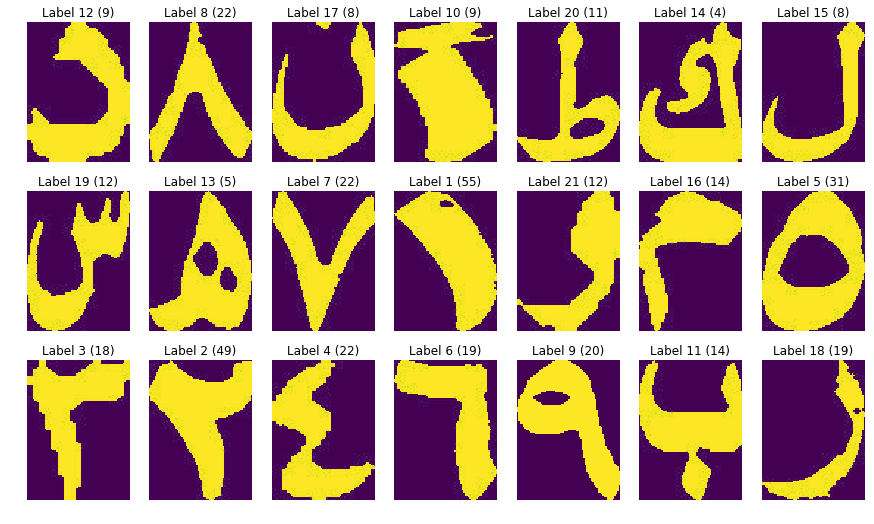

In [28]:
def displayImages():
    Unique_Classes = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    print(Unique_Classes)
    for label in Unique_Classes: 
        image = images[labels.index(label)]
        plt.subplot(5,7,i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()
displayImages()

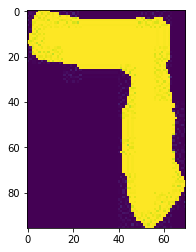

6
6720
6720
6720


In [33]:
#all_values = images[0].split(',')
# scale and shift the inputs
#Normalise inputs

index = random.randint(0,len(images))
display(300)
print(labels[300])
print("====================")

print(len(images[0].flatten()))
h = np.array(images[0].flatten(), ndmin=2).T

print(len(h))
inputs = ((np.asfarray(images[0]) / 255.0 * 0.99) + 0.01 ).flatten()
print(len(inputs))

In [20]:
# train the neural network

# epochs is the number of times the training data set is used for training
_epochs = 10
epochs = []
steps = []
errors = []
index = 0
for epoch in range(_epochs):
    label_index = 0
    
    
    print("training epoch {}\n=======================".format(epoch))
    for record in images:
            
            # split the record by the ',' commas
            #all_values = record.split(',')
            # scale and shift the inputs
            inputs = ((np.asfarray(record) / 255.0 * 0.99) + 0.01 ).flatten()
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = np.zeros(output_nodes) + 0.01
            # the target label for this record
            target_class = labels[label_index]
            #print("{} is {}".format(target_class, len(inputs)))

            targets[int(target_class)] = 0.99
            label_index = label_index + 1
            error = n.train(inputs, targets)
            
            mean = np.sum(error**2)
            
            errors.append(mean)
            

            index +=1
            steps.append(index)
    epochs.append(epoch)
            


training epoch 0
training epoch 1
training epoch 2
training epoch 3
training epoch 4
training epoch 5
training epoch 6
training epoch 7
training epoch 8
training epoch 9


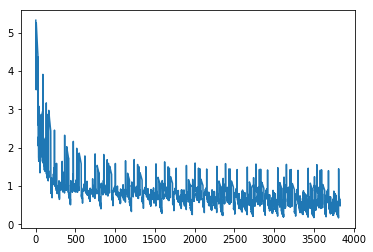

In [11]:
plt.plot(steps,errors)
plt.show()

In [160]:
len(epochs)

10

In [62]:
test_input = ((np.asfarray(images[2]) / 255.0 * 0.99) + 0.01 ).flatten()
output = n.query(test_input)
label = np.argmax(output)
print(output)
print(label)

[[0.04802824]
 [0.42202375]
 [0.0553983 ]
 [0.03039422]
 [0.03215294]
 [0.0535842 ]
 [0.09847783]
 [0.02370324]
 [0.05912053]
 [0.11533493]
 [0.0200932 ]
 [0.02891499]
 [0.02367018]
 [0.01829425]
 [0.01798275]
 [0.02015764]
 [0.03020149]
 [0.01790436]
 [0.02784393]
 [0.02347934]
 [0.03833033]
 [0.03442416]]
1


In [57]:
n.Who = np.loadtxt(cwd +'\\model\\hidden-output.weight')
n.Wih = np.loadtxt(cwd +'\\model\\input-hidden.weight')

In [12]:
count = 0

for i in range(len(images)):
    index = i
    correct = labels[index]
    test_input = ((np.asfarray(images[index]) / 255.0 * 0.99) + 0.01 ).flatten()
    output = n.query(test_input)
    #print(np.where(output == np.max(output)))
    label = np.argmax(output)
    #print("{} with {}".format(label,correct))
    #print(type(label))
    if(label == int(correct)):
        count = count + 1
print(count)        
print("accuracy: {}".format((count/len(images))*100))


276
accuracy: 72.0626631853786


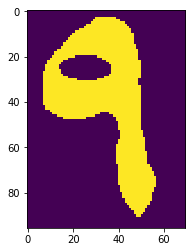

correct:9 
predict 1


In [145]:
index = random.randint(0,len(images))
display(index)
print("correct:%s " % labels[index])
print("====================")
test_input = ((np.asfarray(images[index]) / 255.0 * 0.99) + 0.01 ).flatten()
output = n.query(test_input)
#print(np.where(output == np.max(output)))
label = np.argmax(output)
print("predict %i" % label)

In [337]:
x = np.loadtxt(cwd + '\\model\\hidden-output.weight')
np.savetxt(cwd + '\\model\\input-hidden.weight',n.Wih)
np.savetxt(cwd + '\\model\\hidden-output.weight',n.Who)